# Adam Thomson - PHY 574 - Week 3

## Quantum Phase Estimation to Estimate Pi

The goal of this notebook is to demonstrate a qiskit implementation of a circuit that performs Quantum Phase Estimation. This will then be leveraged to calculate an estimation for pi and compared against the known value. This will be based on the qiskit tutorial notebooks to do the same:
- https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/quantum-phase-estimation.ipynb
- https://github.com/Qiskit/textbook/blob/main/notebooks/ch-demos/piday-code.ipynb

In [8]:
# import libraries
from IPython.display import Math
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.pyplot as plotter

from qiskit import  transpile, assemble, \
    QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

# Initialize local simulator
sampler = AerSimulator()

# Declare shortcut function
def dm(x):
    return display(Math(x))

### Quantum Phase Estimation

In [9]:
# Define QPE
dm(r"\text{To begin, let's examine what Quantum Phase Estimation (QPE) aims to solve:}")
dm(r"\text{Given a unitary operator } U, \text{ find } \theta \text{ such that } U \ket{\psi} = e^{2 \pi i \theta} \ket{\psi}")
dm(r"\text{Where } \ket{\psi} \text{ is an eigenvector and } e^{2 \pi i \theta} \text{ is its associated eigenvalue. } U \text{ is normal, thus eigenvalues have a norm of 1.}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

QPE starts by using phase kickback to write the phase of U into *t* qubits translated into the Fourier basis. By then applying the inverse QFT, we can translate the phase of *U* in the measureable computational basis. Let's examine the individual steps.

In [10]:
# Examine QPE algorithm
dm(r"\text{Start by defining our two quantum registers. One is our interrogated state } \ket{\psi} \text{ and the other is an intialized 'counting' register.}")
dm(r"\ket{\psi_0} = \ket{0}^{\otimes n} \ket{\psi}")
dm(r"\text{Next, apply a Hadamard gate to each qubit in the counting register}")
dm(r"\ket{\psi_1} = (H^{\otimes n} \ket{0}^{\otimes n})(I \ket{\psi}) = \frac1{2^{\frac n2}} (\ket0 + \ket1)^{\otimes n} \ket{\psi}")
dm(r"\text{Use Controlled-Unitary (CU) gates to transform } \ket{\psi} \text{ with the superposition counting qubits as the control.}")
dm(r"\text{Using the fact that } U\ket{\psi} = e^{2 \pi i \theta} \ket{\psi} \text{ we can simplify the following}")
dm(r"U^{2^j} \ket{\psi} = e^{2 \pi i 2^j \theta} \ket {\psi}")
dm(r"\text{If we then apply all of the } CU^{2^j} \text{ operations and combine with the following relation, we find that...}")
dm(r"\ket0 \otimes \ket{\psi} + \ket1 \otimes e^{2 \pi i \theta} \ket{\psi} = (\ket0 + e^{2 \pi i \theta}\ket1) \otimes \ket{\psi}")
dm(r"""\ket{\psi_2} = \frac1{2^{\frac n2}} [
   (\ket0 + e^{2 \pi i \theta 2^{n-1}} \ket1) \otimes
   ... \otimes
   (\ket0 + e^{2 \pi i \theta 2^{1}} \ket1) \otimes
   (\ket0 + e^{2 \pi i \theta 2^{0}} \ket1) ] \otimes
   \ket{\psi}
""")
dm(r"\qquad = \frac1{2^{\frac n2}} \sum_{k=0}^{2^n-1} e^{2 \pi i \theta k} \ket{k} \otimes \ket{\psi}")
dm(r"\text{Note that this expression is the exact result of applying QFT as previously derived if we substitue } x = 2^n \theta")
dm(r"\text{Therefore, we can recover } 2^n \theta \text{ by applying the inverse QFT and then get the desired } \theta")
dm(r"""\ket{\psi_3} = QFT^\dagger \ket{\psi_2} =
    \frac1{2^n} \sum_{x=0}^{2^n-1} \sum_{k=0}^{2^n-1} e^{-\frac{2 \pi i k}{2^n}(x - 2^n \theta)} \ket{x} \otimes \ket{\psi}
""")
dm(r"\text{Upon measuring the counting qubits, there is a high probability of measuring } \theta, \text{ particularly when } 2^n \theta \text{ is an integer.}")
dm(r"\ket{\psi_4} = Meas_{count}(\ket{\psi_3}) \approx \ket{2^n \theta} \otimes \ket{\psi}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Let's construct an example circuit to find the known phase (8) of the unitary gate *T*.

In [11]:
# Define T
dm(r"T = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i \pi}4} \end{bmatrix}")
dm(r"T\ket1 = e^{\frac{i \pi}4} \ket1")
dm(r"\text{We know that QPE will give us } \theta \text{ where } T\ket1 = e^{2 i \pi \theta}\ket1")
dm(r"\therefore \theta = \frac18")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

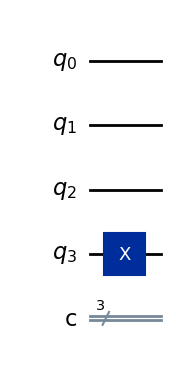

In [12]:
# Initialize quantum circuit

# Create a quantum circuit with:
#  two quantum registers (a 3-qubit counting register and a 1-qubit state)
#  and a 3-bit classical register
qpe_qc = QuantumCircuit(4, 3)
# Set |ψ> = |1> using X-gate
qpe_qc.x(3)
# Draw initialized circuit
qpe_qc.draw(output="mpl")

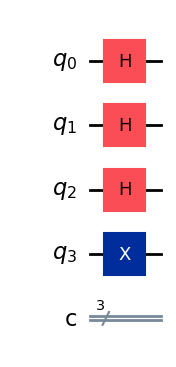

In [13]:
# Prepare counting qubits

# Apply a Hadamard gate to each of the 3 counting qubits
qpe_qc.h(range(3))
qpe_qc.draw(output="mpl")

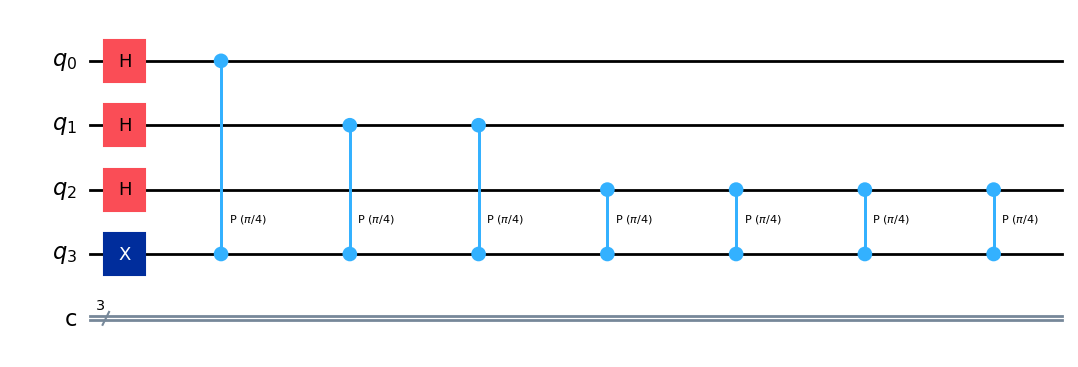

In [14]:
# Perform CU-gates

# Use this to scale how much to phase rotation is applied to a qubit
repetitions = 1

# Loop through counting qubits and transform phase into fourier basis
for counting_qubit in range(3):
    # Each counting qubit uses increasing number of gate applications
    for i in range(repetitions):
        # Use the qiskit Controlled-Phase gate to model T operator
        qpe_qc.cp(math.pi/4, counting_qubit, 3)
    # Double the number of repetitions for next counting qubit
    repetitions *= 2

qpe_qc.draw(output='mpl')

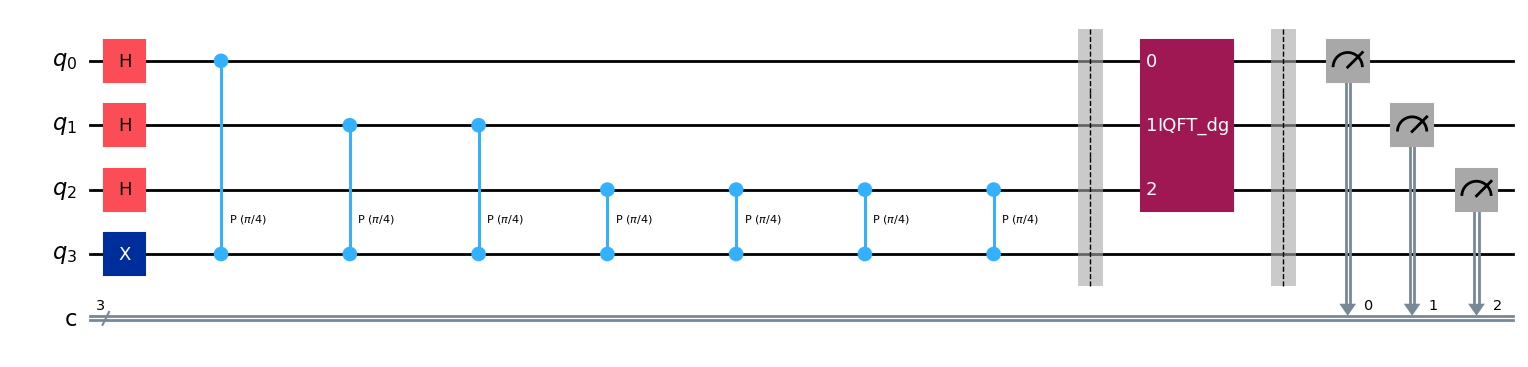

In [15]:
# Apply inverse-QFT

# Visual separation of steps
qpe_qc.barrier()

# Construct and apply custom inverse-QFT gate
qpe_qc = qpe_qc.compose(QFT(3, inverse=True), range(3))

qpe_qc.barrier()

# Measure counting qubits to classical register
for n in range(3):
    qpe_qc.measure(n, n)

qpe_qc.draw(output="mpl")

Now that we've build a circuit, let's measure the results and see if we get the correct value for *T*.

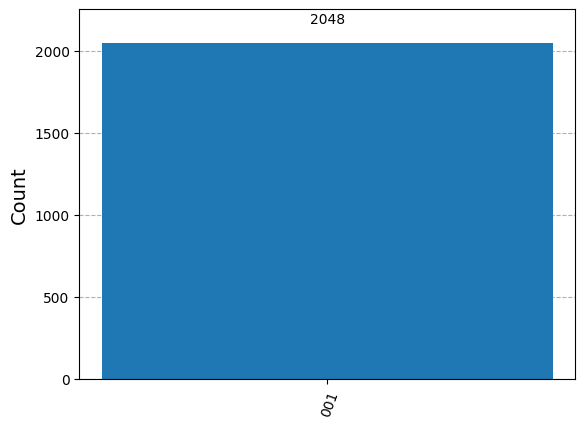

In [16]:
# Run the circuit on a local simulation

# transpile circuit to run on sampler
t_qpe_qc = transpile(qpe_qc, sampler)

# Run the circuit and collect results
results = sampler.run([t_qpe_qc], shots=2048).result()

# Graph the results
plot_histogram(results.get_counts())

We see that 100% of measurements are for `001` or the decimal value `1`. We now divide that by `2^n` to find our calculated θ.

In [17]:
# Calculate theta
dm(r"\theta = \frac1{2^3} = \frac18")
dm(r"\text{Is exactly what we expected for the known } T")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

What about when we use a non-integer such as `θ=1/3`? Let's repeat circuit setup and sampling to examine results.

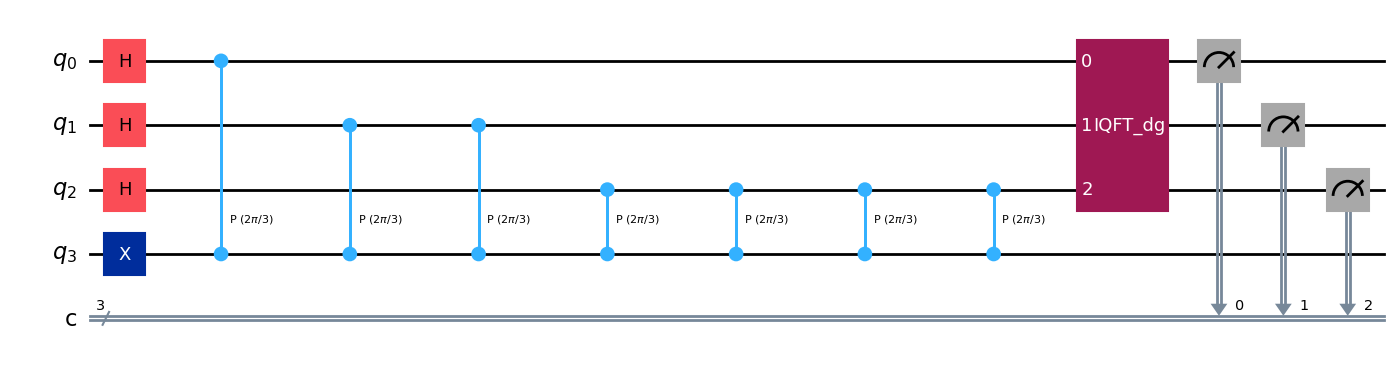

In [18]:
# Repeat QPE circuit and sampling

# Use the same set of registers as before
qpe_13_qc = QuantumCircuit(4, 3)

# Prepare counting qubits by applying Hadamard gate
qpe_13_qc.h(range(3))

# And the eigenstate |ψ> = |1>
qpe_13_qc.x(3)

# Calculate the angle of phase rotation for qiskit CP gate
angle = 2*math.pi / 3

# Reuse algorithm of increasing repeteated phase rotation
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe_13_qc.cp(angle, counting_qubit, 3);
    repetitions *= 2

# Apply the inverse-QFT
qpe_13_qc = qpe_13_qc.compose(QFT(3, inverse=True), range(3))

# Measure to classical register
for n in range(3):
    qpe_13_qc.measure(n, n)

qpe_13_qc.draw(output="mpl")

Note that this looks exactly like our previous circuit, but with a different angle of phase rotation - `2pi/3` instead of `pi/4`

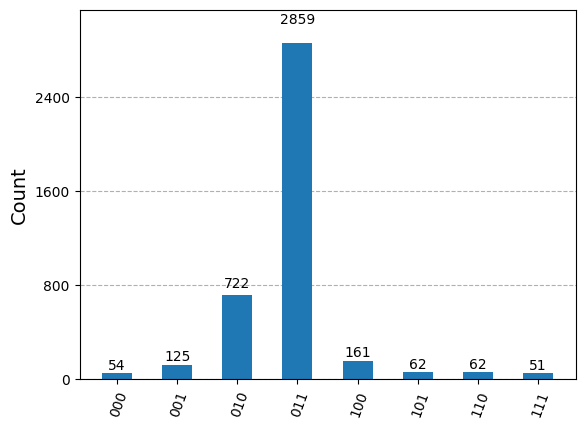

In [19]:
# Examine sampling of the circuit

t_qpe13 = transpile(qpe_13_qc, sampler)
results_13 = sampler.run([t_qpe13], shots=4096).result()
plot_histogram(results_13.get_counts())

We see 2 results with significantly higher probability of measurement: `010` and `011`, corresponding to the decimals `2` and `3`. Dividing by `2^n` we estimate our calculated θ to be somewhere between these.

In [20]:
dm(r"\frac2{2^3} \leq \theta \leq \frac3{2^3}")
dm(r"\frac14 = 0.25 < \theta < \frac38 = 0.375")
dm(r"\text{This holds true for } \theta = \frac13 !")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

By adding more counting qubits, we can get a more precise estimation for θ. Let's repeat with 5 counting qubits

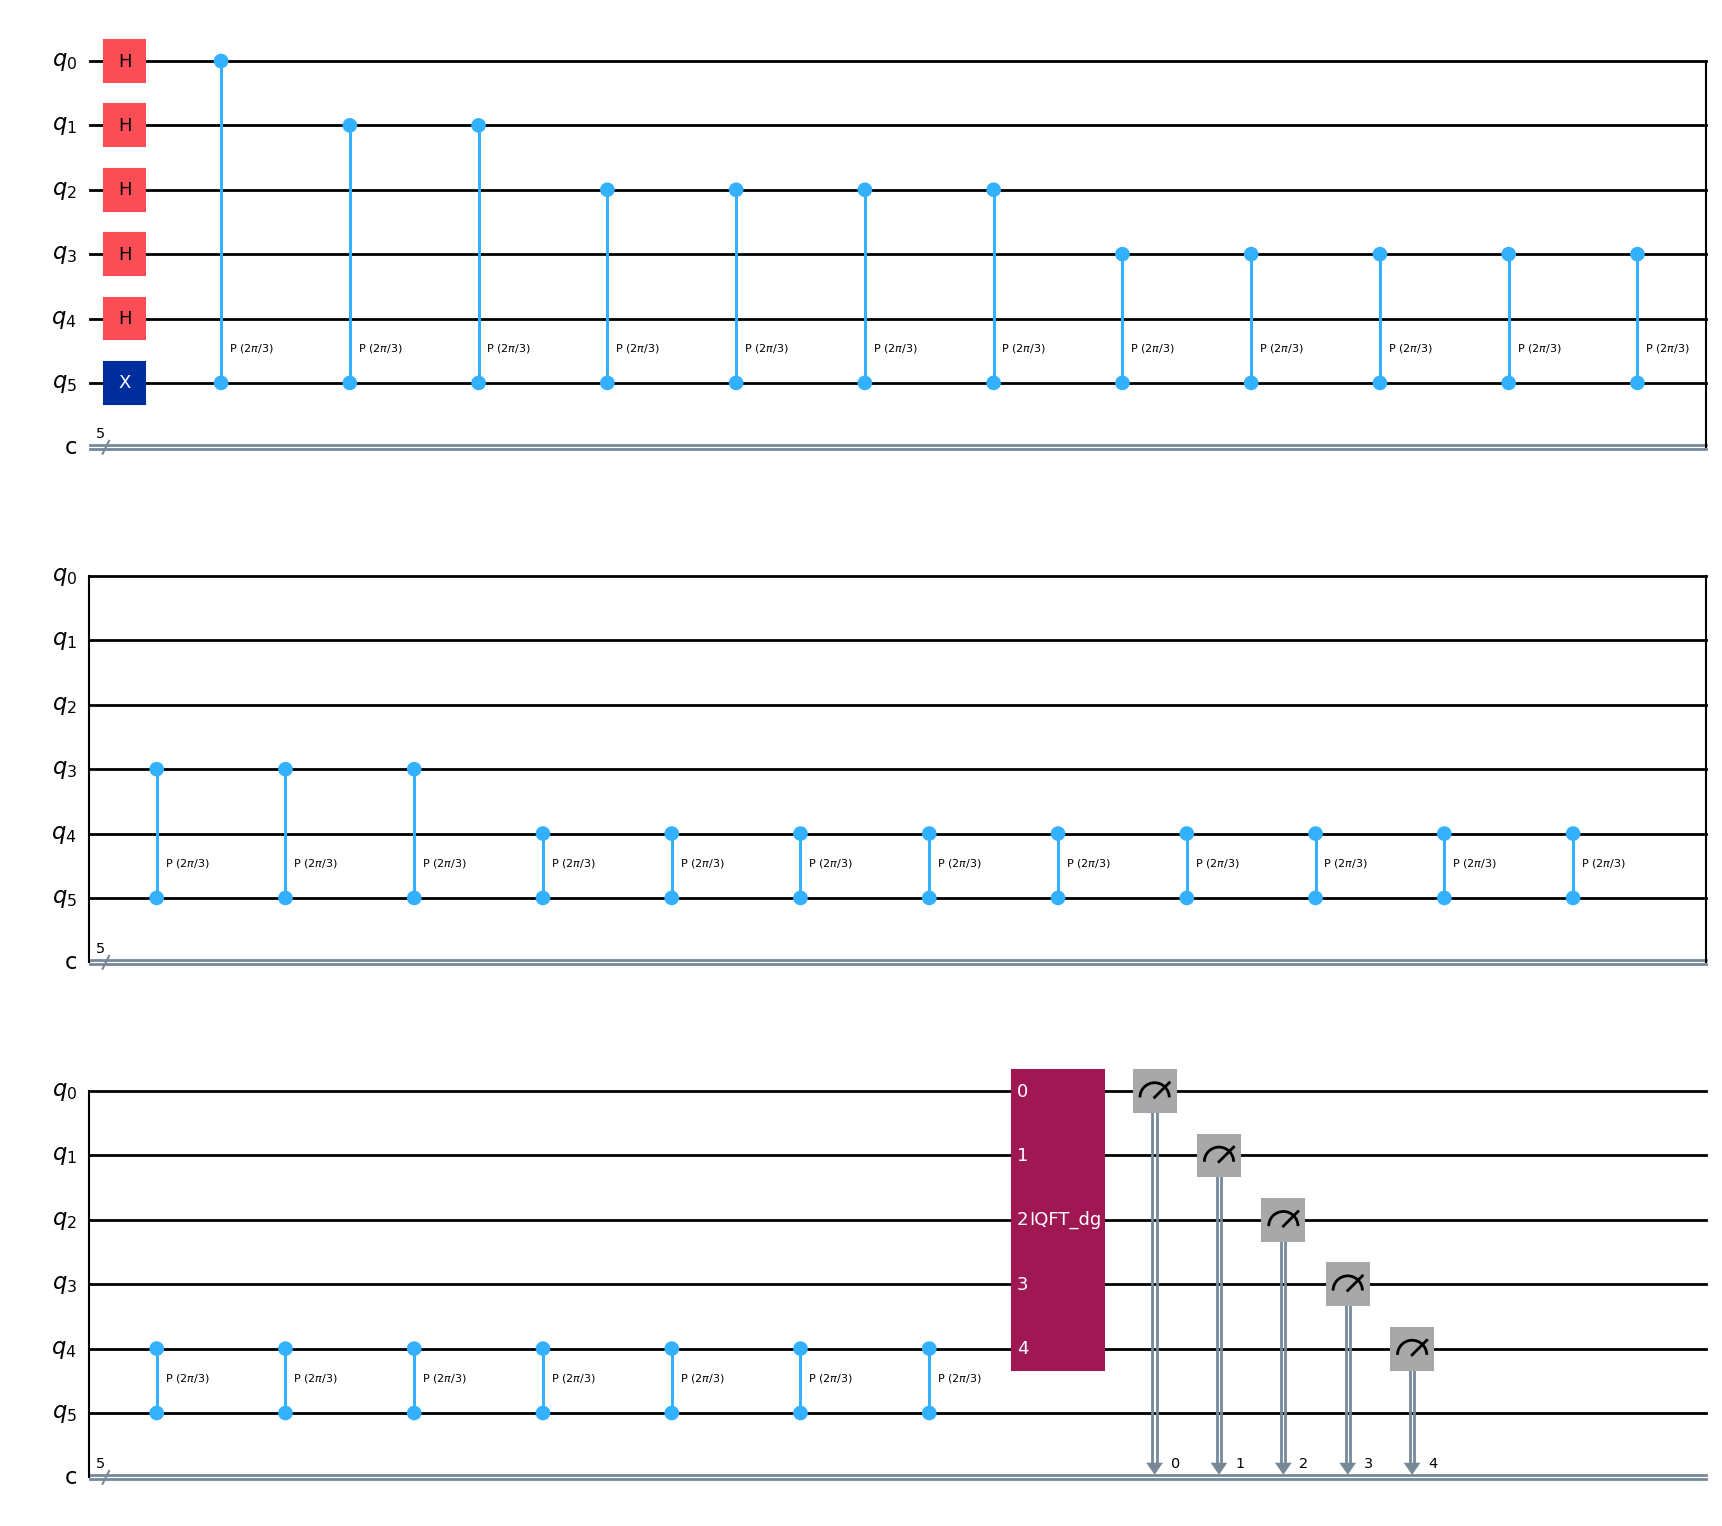

In [21]:
# Repeat QPE

# Construct a circuit with 5 counting qubits and 5 classical bits to measure to
qpe_13_5 = QuantumCircuit(6, 5)

# Initialize our counting qubits and input eigenstate
qpe_13_5.h(range(5))
qpe_13_5.x(5)

# Reuse the repeated CP operation with the same (2pi/3) angle
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe_13_5.cp(angle, counting_qubit, 5);
    repetitions *= 2

# Construct and apply the inverse-QFT
qpe_13_5 = qpe_13_5.compose(QFT(5, inverse=True), range(5))

# Measure and draw
for n in range(5):
    qpe_13_5.measure(n, n)

qpe_13_5.draw(output="mpl")

By doubling the number of repetitions of CU for each additional counting qubit, we see the circuit grow very quickly!

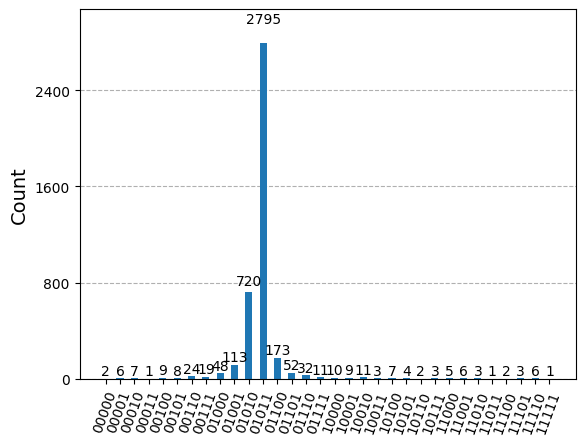

In [22]:
# Examine the results

t_qpe13_5 = transpile(qpe_13_5, sampler)
results = sampler.run([t_qpe13_5], shots=4096).result()
plot_histogram(results.get_counts())

We see again that 2 results have significantly higher probability than others, `01010` and `01011`. Let's use these to find bounds of θ again.

In [23]:
dm(r"\theta_{01010} = \frac{10}{2^5} = 0.3125")
dm(r"\theta_{01011} = \frac{11}{2^5} = 0.34375")
dm(r"0.3125 < \theta < 0.34375")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Which continues to hold true, and we now have a smaller range of possible values for the actual θ.

#### Real Devices

Let's return the the example of finding θ for *T* but running on real quantum hardware this time.

In [24]:
# Real hardware experiment setup
# Additional imports
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# To run on hardware, select the backend with the fewest number of jobs in the queue
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False)
backend.name

'ibm_brisbane'

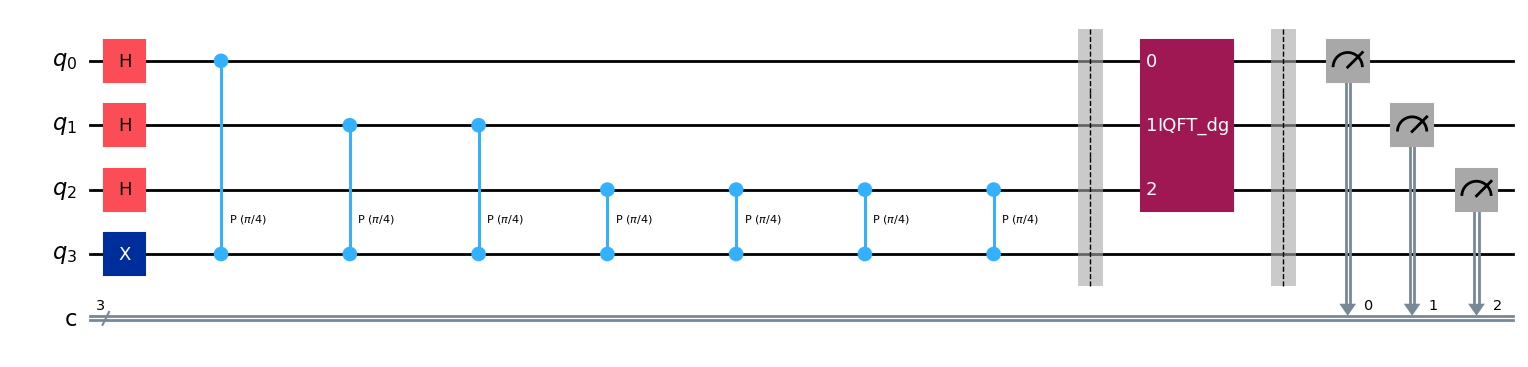

In [25]:
# Recall the QPE circuit for T

qpe_qc.draw(output="mpl")

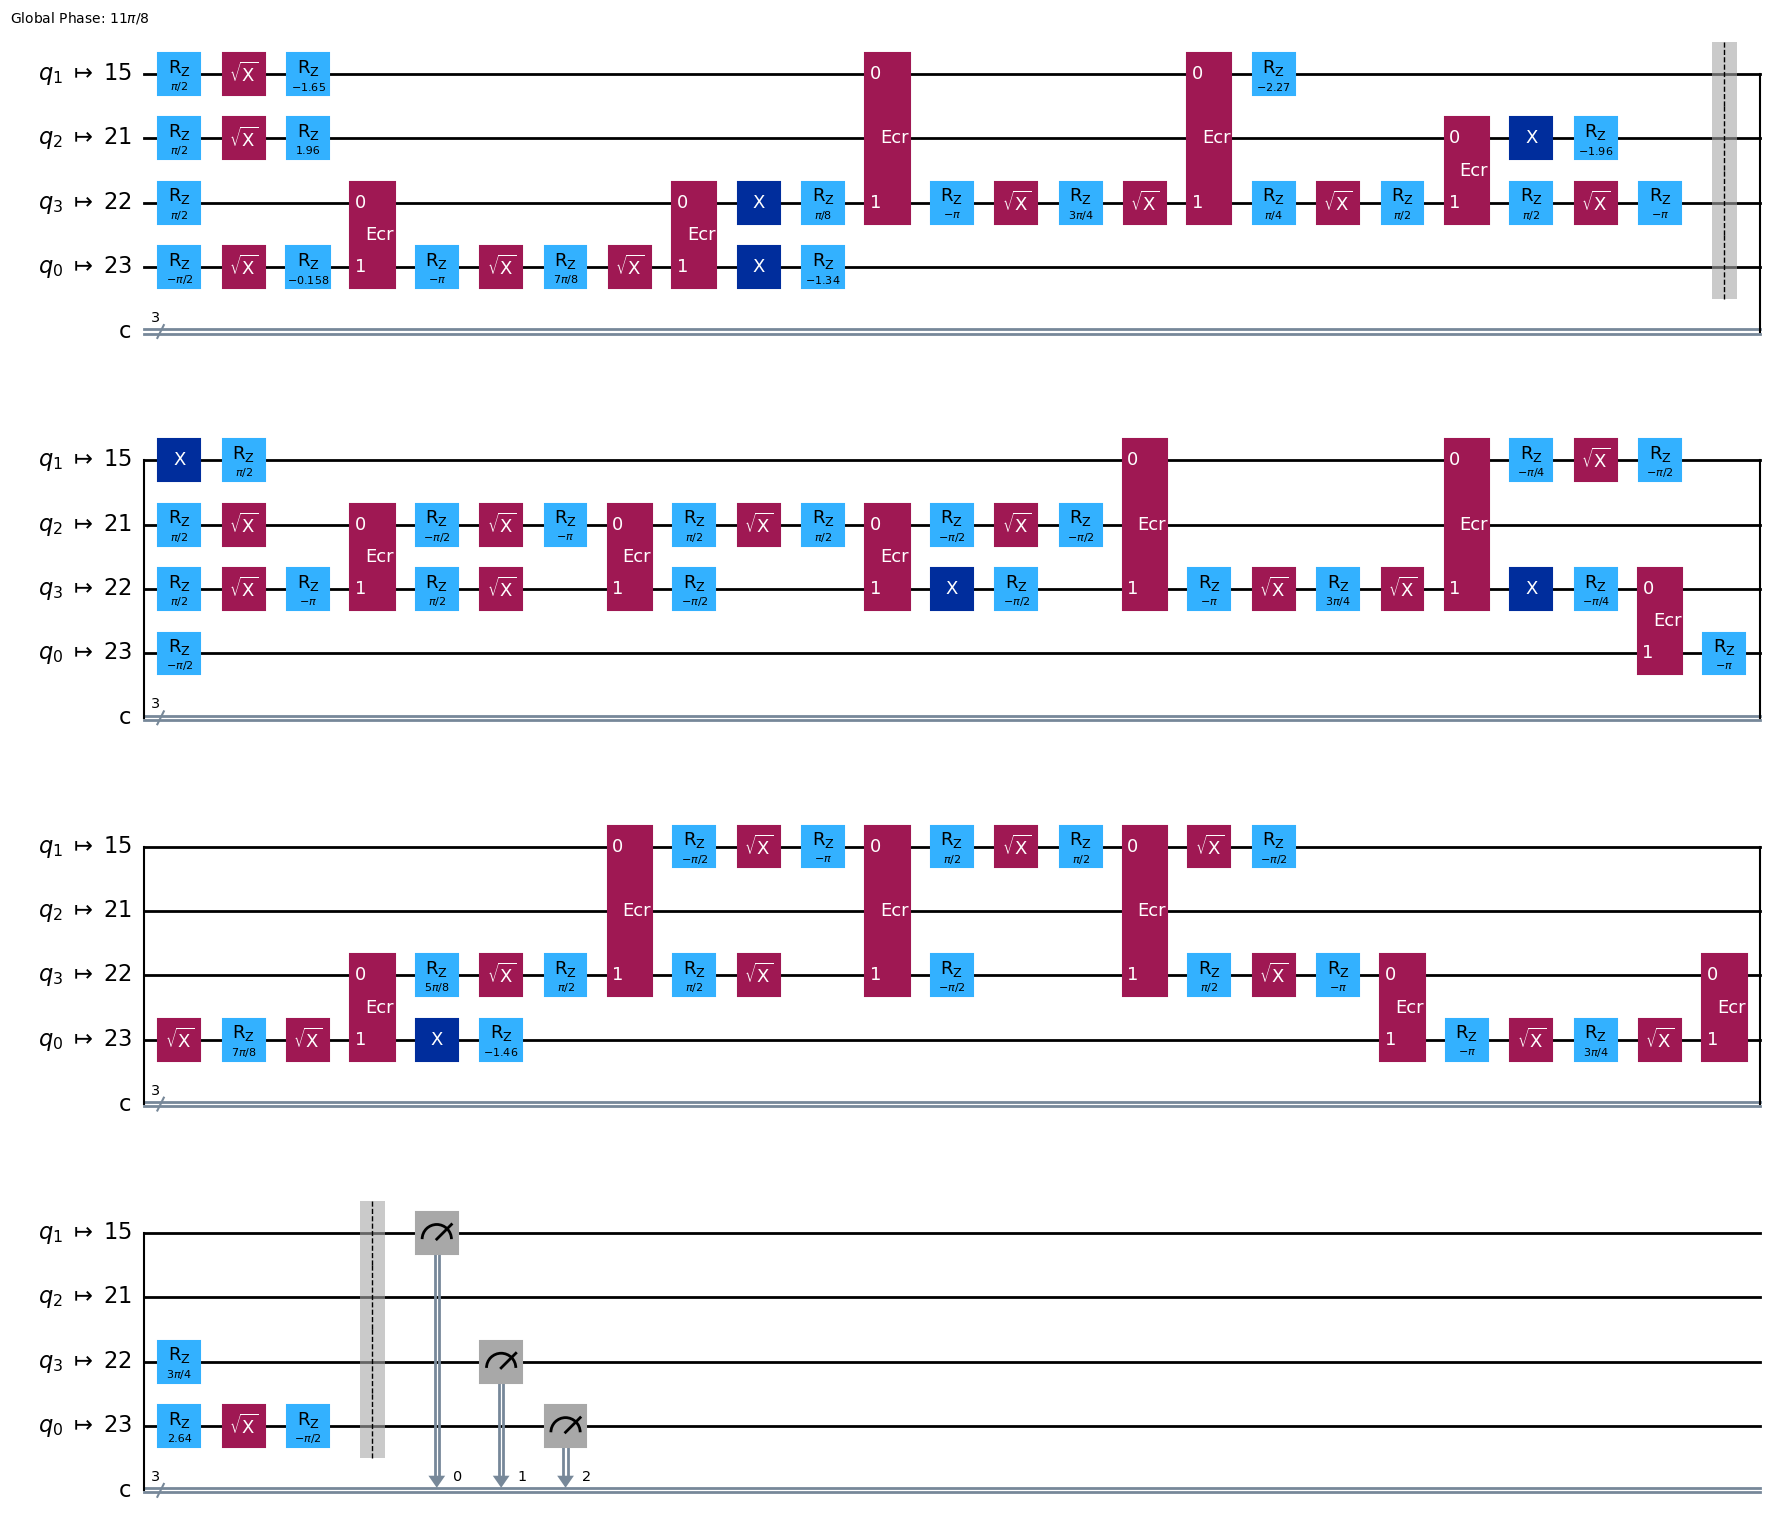

In [26]:
# Run the circuit on quantum hardware

# Transpile the circuit for real device
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

# Draw the transpiled circuit
tq_qpe_qc = pm.run(qpe_qc)
tq_qpe_qc.draw(output="mpl", idle_wires=False, style="iqp")


In [27]:
# Run the circuit and wait for the results
sampler2 = SamplerV2(mode=backend)
sampler2.options.default_shots = 2_048
result = sampler2.run([tq_qpe_qc]).result()[0]

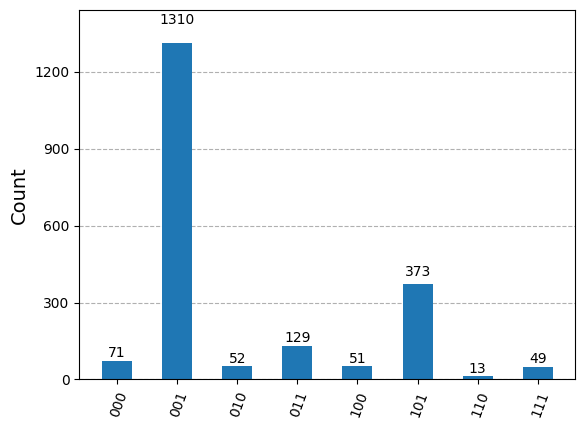

In [28]:
# Plot the results
test_counts = result.data.c.get_counts()
plot_histogram(test_counts)

Even though we have an exact right answer that, theoretically, should be the result 100% of the time, noise in the system means we get other measured values. However, our most likely result is `001`, which will give us the correct `θ=1/8`

## Estimating Pi

Let's continue this example by using QPE to estimate the value of π. We'll do this by creating some helper functions that can be reused for an increasing number of counting qubits. We'll then programatically repeat QPE circuit construction and sampling to get values of θ within increasing precision and, hopefully, accuracy.

In [29]:
# Define the inverse-QFT function

def qft_dagger(qc_, n_qubits):
    """n-qubit QFT-dagger the the first n qubits in qc"""
    # Reverse the order of qubits for qiskit convention
    for qubit in range(int(n_qubits/2)):
        qc_.swap(qubit, n_qubits-qubit-1)
    # Use CP and Hadamard gates in opposite order of QFT transformation
    for j in range(0,n_qubits):
        for m in range(j):
            qc_.cp(-np.pi/float(2**(j-m)), m, j)
        qc_.h(j)

In [30]:
# Prepare the QPE circuit

def qpe_pre(qc_, n_qubits):
    """Initialize a QPE circuit, including phase kick back"""
    # Apply Hadamard gate to all counting qubits
    qc_.h(range(n_qubits))
    # Prepare eigenstate |1>
    qc_.x(n_qubits)

    # Apply repeated phase rotations to counting qubits, simplified to not use `repetitions` variable
    for x in reversed(range(n_qubits)):  # Reversed for qiskit convention
        for _ in range(2**(n_qubits-1-x)):
            qc_.cp(1, n_qubits-1-x, n_qubits)

In [31]:
# Sample circuit and return results

def run_job(qc_, shots=1000):
    """Simulate a circuit and return counts"""
    result = sampler.run([qc_], shots=shots).result()
    return result.get_counts()

def run_qjob(qc_, shots=1000):
    """Run circuit on real hardware and return counts"""
    t_qc = pm.run(qc_)
    result = sampler2.run([t_qc], shots=shots).result()[0]
    return result.data.c.get_counts()

Now that we have helper methods established, let's use them to estimate π.

In [32]:
# Determine angle of phase rotation
dm(r"\text{Before continuing, we need to determine our phase rotation angle.}")
dm(r"\text{We are solving for } P(\theta) \ket{1} = e^{2 \pi i \theta} \ket{1}")
dm(r"\text{ If we use } \theta = 1 \text{ then after QPE we expect to measure } 2\pi")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [33]:
# Calculate an estimation for pi

def get_pi_estimate(n_qubits, shots=1000, simulator=True):
    """Use QPE with n_qubits to estimate the value of pi"""
    # Initialize the circuit with n+1 qubits and n bits
    qpe_qc = QuantumCircuit(n_qubits+1, n_qubits)

    # Apply the prepared QPE steps
    qpe_pre(qpe_qc, n_qubits)

    qpe_qc.barrier()

    # Apply the inverse QFT
    qft_dagger(qpe_qc, n_qubits)

    qpe_qc.barrier()

    # Measure counting qubits to classical register
    qpe_qc.measure(range(n_qubits), range(n_qubits))

    # Run the job on simulation or real hardware
    counts = None
    if simulator:
        counts = run_job(qpe_qc, shots=shots)
    else:
        counts = run_qjob(qpe_qc, shots=shots)

    # Determine the result with the most frequency
    max_counts = max(counts, key=counts.get)
    # Convert binary result key into integer for calculation
    max_counts_result = int(max_counts, 2)

    # Calculate an estimate for pi based on result
    theta = max_counts_result/2**n_qubits
    return (1./(2*theta))

In [34]:
# Examine effect of increasing qubits on estimation of pi

# Add 1 more to example for 13 qubit estimation
nqs = list(range(2, 13+1))
# Store estimates as we go
pi_estimates = []
# Print estimates with increasing qubits
for nq in nqs:
    # Calculate estimate for pi using nq qubits
    n_pi_est = get_pi_estimate(nq)
    pi_estimates.append(n_pi_est)
    dm(r"{0} \text{ qubits: } \pi \approx {1}".replace("{0}", str(nq)).replace("{1}", str(n_pi_est)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We see that after 10 qubits, our estimation for π does not get more accurate. I was unable to simulate any more qubits without crashing the jupyter kernel, so I leave it as an exercise to the reader to find out.

In [35]:
# More qubits!

print("Left commented out in case user hits Run All")
# nqs2 = list(range(13, 20+1))
# # Store estimates as we go
# pi_estimates2 = []
# # Print estimates with increasing qubits
# for nq in nqs2:
#     # Calculate estimate for pi using nq qubits
#     n_pi_est = get_pi_estimate(nq)
#     pi_estimates.append(n_pi_est)
#     dm(r"{0} \text{ qubits: } \pi \approx {1}".replace("{0}", str(nq)).replace("{1}", str(n_pi_est)))

Left commented out in case user hits Run All


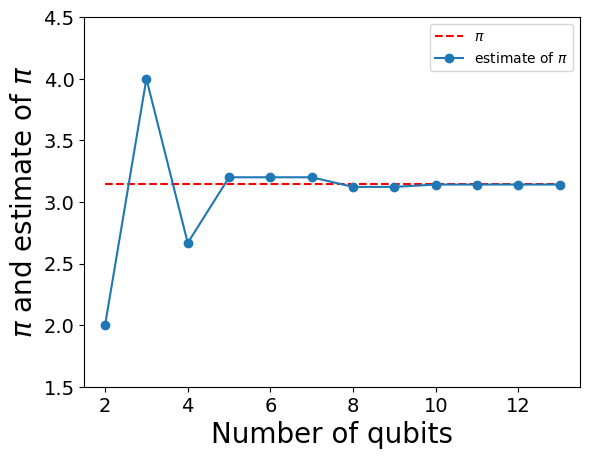

In [38]:
# Plot the results
plotter.plot(nqs, [math.pi]*len(nqs), '--r')
plotter.plot(nqs, pi_estimates, '.-', markersize=12)
plotter.xlim([1.5, 13.5])
plotter.ylim([1.5, 4.5])
plotter.legend(['$\\pi$', 'estimate of $\\pi$'])
plotter.xlabel('Number of qubits', fontdict={'size':20})
plotter.ylabel('$\\pi$ and estimate of $\\pi$', fontdict={'size':20})
plotter.tick_params(axis='x', labelsize=14)
plotter.tick_params(axis='y', labelsize=14)
plotter.show()

We see that the results converge on the true value of π as expected!

What about when we use real quantum hardware? Our simulations show that we should be able to get a fairly close approximation with just 5 qubits.

In [46]:
# Estimate pi on real quantum hardware with 5 qubits
q_pi_est = get_pi_estimate(nq, simulator=False)
dm(r"5 \text{ real qubits: } \pi \approx {1}".replace("{1}", str(q_pi_est)))

KeyboardInterrupt: 